In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




import warnings
warnings.filterwarnings('ignore')

capture_site = pd.read_csv('data/CaptureSite_category.csv')

In [37]:
capture_site

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1
5,CaptureSite_13,CaptureSiteCategory_2,Type_1
6,CaptureSite_14,CaptureSiteCategory_4,Type_0
7,CaptureSite_15,CaptureSiteCategory_0,Type_0
8,CaptureSite_16,CaptureSiteCategory_4,Type_0
9,CaptureSite_17,CaptureSiteCategory_4,Type_0


In [38]:
sample_sub = pd.read_csv('data/Sample_sub.csv')

In [39]:
sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1276 non-null   object
 1   Capture_Number  1276 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.1+ KB


In [40]:
sample_sub.groupby('ID').count()

,Capture_Number
ID,
CaptureSite_0_201901,1
CaptureSite_0_201902,1
CaptureSite_0_201903,1
CaptureSite_0_201904,1
CaptureSite_0_201905,1
...,...
CaptureSite_9_201940,1
CaptureSite_9_201941,1
CaptureSite_9_201942,1


In [41]:
train_df = pd.read_csv('data/train.csv')

In [42]:
train_df.head()


,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [43]:
#train_df.groupby('ReleaseSite').size()

#We can drop the column Sex, since the most values are Unknown 
df = train_df.groupby('Date_TimeCaught').size().reset_index(name='Size')
df.sort_values('Size', ascending= False).tail(60)


,Date_TimeCaught,Size
2661,2011-06-09,1
645,2003-09-18,1
1499,2007-07-24,1
4099,2015-08-19,1
2669,2011-06-20,1
4097,2015-08-17,1
648,2003-09-21,1
651,2003-09-25,1
652,2003-09-26,1
4056,2015-07-06,1


In [44]:
def extract_number_split(s):
    num = s.split('_')[-1]
    return int(num)

extract_number_split('Fischer_5')

5

In [45]:
train_df['Fisher'] = train_df['Fisher'].apply(extract_number_split)

train_df['Fisher']

0        1072
1         520
2        1669
3        1798
4        1918
         ... 
18057     569
18058     125
18059    1343
18060    1551
18061    1551
Name: Fisher, Length: 18062, dtype: int64

In [46]:
train_df['Researcher'] = train_df['Researcher'].apply(extract_number_split)

train_df['Researcher']

0        25
1         6
2         6
3        32
4        25
         ..
18057    30
18058    30
18059    30
18060    30
18061    30
Name: Researcher, Length: 18062, dtype: int64

In [47]:
train_df['CaptureSite'] = train_df['CaptureSite'].apply(extract_number_split)

train_df['CaptureSite']

0        0
1        0
2        0
3        0
4        0
        ..
18057    9
18058    9
18059    9
18060    9
18061    9
Name: CaptureSite, Length: 18062, dtype: int64

In [48]:

train_df['Species'] = train_df['Species'].apply(extract_number_split)

train_df['Species']

0        6
1        6
2        5
3        6
4        5
        ..
18057    5
18058    6
18059    5
18060    5
18061    6
Name: Species, Length: 18062, dtype: int64

In [49]:

#train_df['ReleaseSite'] = train_df['ReleaseSite'].apply(extract_number_split)

#train_df['ReleaseSite']

In [50]:
train_df['Date_TimeCaught'] = pd.to_datetime(train_df['Date_TimeCaught'], format='%Y-%m-%d')

train_df['Date_TimeCaught'] 

0       2000-12-22
1       2001-10-28
2       2001-11-01
3       2002-03-11
4       2002-08-08
           ...    
18057   2018-12-18
18058   2018-12-18
18059   2018-12-24
18060   2018-12-24
18061   2018-12-28
Name: Date_TimeCaught, Length: 18062, dtype: datetime64[ns]

In [51]:
train_df['week'] = train_df['Date_TimeCaught'].dt.isocalendar().week

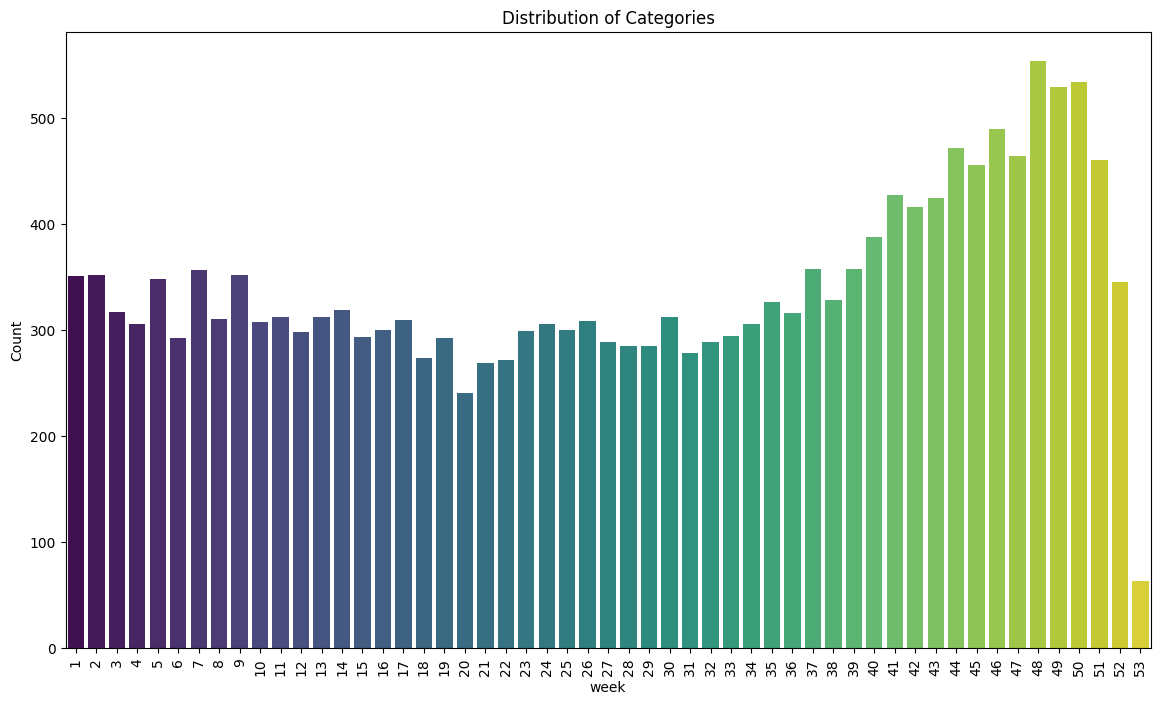

In [52]:
category_counts = train_df['week'].value_counts()

# Plotting using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('week')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()

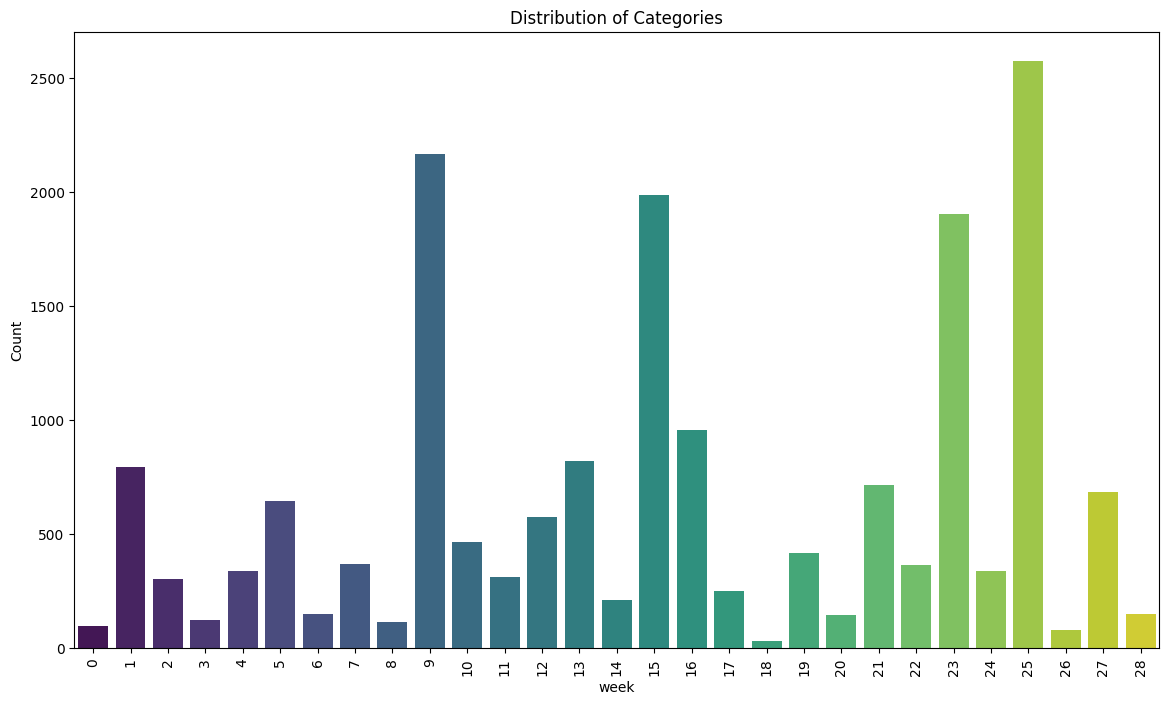

In [53]:
category_counts = train_df['CaptureSite'].value_counts()

# Plotting using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('week')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()

In [54]:
train_df

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,week
0,2000_RE_0060,2000-12-22,25,0,Ocean,Net,1072,LandingSite_CaptureSiteCategory_2,6,CC00147,...,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,51
1,2001_RE_0187,2001-10-28,6,0,Ocean,Net,520,LandingSite_CaptureSiteCategory_2,6,W442,...,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,43
2,2001_RE_0197,2001-11-01,6,0,Ocean,Net,1669,LandingSite_CaptureSiteCategory_2,5,KE0376,...,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01,44
3,2002_RE_0031,2002-03-11,32,0,Ocean,Net,1798,LandingSite_CaptureSiteCategory_2,6,CC00302,...,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,11
4,2002_RE_0118,2002-08-08,25,0,Ocean,Beached,1918,LandingSite_CaptureSiteCategory_2,5,NotTagged_0113,...,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18057,2018_RE_1511,2018-12-18,30,9,Ocean,Net,569,LandingSite_CaptureSiteCategory_1,5,KES1828,...,NaN,57.13,50.57,21.09,Unknown,White calcareous algae on carapace,Released,ReleaseSite_68,18/12/18,51
18058,2018_RE_1514,2018-12-18,30,9,Ocean,Net,125,LandingSite_CaptureSiteCategory_1,6,KES0563,...,NaN,42.07,38.37,9.02,Unknown,Calcareous + green algae on carapace\nBarnacle...,Released,ReleaseSite_68,18/12/18,51
18059,2018_RE_1532,2018-12-24,30,9,Ocean,Net,1343,LandingSite_CaptureSiteCategory_1,5,KES1833,...,NaN,57.20,52.30,NaN,Unknown,Clean turtle,Released,ReleaseSite_68,24/12/18,52
18060,2018_RE_1533,2018-12-24,30,9,Ocean,Net,1551,LandingSite_CaptureSiteCategory_1,5,KES1831,...,NaN,51.90,48.50,NaN,Unknown,Green algae on carapace\ntip of left supra mis...,Released,ReleaseSite_68,24/12/18,52


In [55]:
train_df.nunique()

Rescue_ID                18062
Date_TimeCaught           5237
Researcher                  35
CaptureSite                 29
ForagingGround               3
CaptureMethod               15
Fisher                    2085
LandingSite                  5
Species                      8
Tag_1                     8235
Tag_2                      246
Lost_Tags                  167
T_Number                    38
CCL_cm                    1338
CCW_cm                    1262
Weight_Kg                 1937
Sex                          4
TurtleCharacteristics    16342
Status                     439
ReleaseSite                271
Date_TimeRelease          3008
week                        53
dtype: int64

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rescue_ID              18062 non-null  object        
 1   Date_TimeCaught        18062 non-null  datetime64[ns]
 2   Researcher             18062 non-null  int64         
 3   CaptureSite            18062 non-null  int64         
 4   ForagingGround         18062 non-null  object        
 5   CaptureMethod          18062 non-null  object        
 6   Fisher                 18062 non-null  int64         
 7   LandingSite            18062 non-null  object        
 8   Species                18062 non-null  int64         
 9   Tag_1                  17937 non-null  object        
 10  Tag_2                  4911 non-null   object        
 11  Lost_Tags              925 non-null    object        
 12  T_Number               38 non-null     object        
 13  C

In [57]:
df = train_df.groupby('Status').size().reset_index(name='Size')
df.sort_values('Size', ascending= False).head(60)



,Status,Size
429,Released,13610
426,Admitted,292
428,Not_Recorded,28
312,shell is beginning to flake,7
258,no other major characteristics,7
193,green algae on carapace,7
259,no other major physical characteristics,6
191,generally clean turtle,5
142,clean plastron,4
389,thin green algae on carapace,4


In [58]:
#We want to start the 

train_df.query('Date_TimeRelease.isna()')

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,week
9,2003_RE_0187,2003-06-09,32,0,Ocean,Net,1066,LandingSite_CaptureSiteCategory_2,5,KE1184,...,NaN,48.30,43.30,NaN,Unknown,10 LMS has a small chip& right rear flipper is...,Released,ReleaseSite_62,NaN,24
11,2003_RE_0363,2003-09-02,32,0,Ocean,Longline,2065,LandingSite_CaptureSiteCategory_2,5,KE1323,...,NaN,43.40,41.70,NaN,Unknown,small scratches and saome flakings on the shel...,Released,ReleaseSite_62,NaN,36
12,2003_RE_0411,2003-09-22,30,0,Ocean,Net,2013,LandingSite_CaptureSiteCategory_2,5,KE1359,...,NaN,58.20,53.30,NaN,Unknown,white calcerous algae on 5CS anmd supras& inde...,Released,ReleaseSite_50,NaN,39
16,2004_RE_0300,2004-10-16,10,0,Ocean,Net,838,LandingSite_CaptureSiteCategory_2,5,KE1609,...,NaN,37.00,36.10,NaN,Unknown,Tip of LFF missing.,Released,ReleaseSite_62,NaN,42
17,2008_RE_0022,2008-01-23,30,0,Ocean,Net,257,LandingSite_CaptureSiteCategory_2,5,3396,...,NaN,38.10,38.20,NaN,NaN,6 CS& 5 RLS. Brown algae on flippers& neck and...,NaN,ReleaseSite_62,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17919,2018_RE_0566,2018-05-12,30,9,Ocean,Net,1551,LandingSite_CaptureSiteCategory_1,5,KES1496,...,T466,59.90,59.70,29.37,Unknown,"Fibro tumours on eyes, neck, shouders, flipper...",Admitted,ReleaseSite_0,NaN,19
18012,2018_RE_1131,2018-10-14,30,9,Ocean,Net,1728,LandingSite_CaptureSiteCategory_1,5,none,...,NaN,58.27,51.07,18.45,Unknown,"Fibro tumors on eyes, neck\nGreen algae on car...",Admitted,ReleaseSite_0,NaN,41
18034,2018_RE_1392,2018-11-30,30,9,Ocean,Net,1550,LandingSite_CaptureSiteCategory_1,5,KES1791,...,NaN,52.93,47.37,17.79,Unknown,Barnacles on carapace \nTiny barnacles on rear...,Admitted,ReleaseSite_0,NaN,48
18037,2018_RE_1421,2018-12-04,20,9,Ocean,Jarife,1550,LandingSite_CaptureSiteCategory_1,5,KES1796,...,NaN,47.07,45.53,12.99,Unknown,Small patch of fibro on eye\nPatches of algae ...,Admitted,ReleaseSite_0,NaN,49


In [59]:
train_df[['Lost_Tags', 'Tag_1', 'Tag_2','Rescue_ID' ,'Date_TimeCaught']].query('Tag_1.isna() and Tag_2.isna() and Lost_Tags.isna()')

,Lost_Tags,Tag_1,Tag_2,Rescue_ID,Date_TimeCaught
381,NaN,NaN,NaN,2012_RE_1653,2012-07-15
426,NaN,NaN,NaN,2012_RE_1360,2012-11-03
978,NaN,NaN,NaN,2005_RE_0444,2005-05-22
979,NaN,NaN,NaN,2005_RE_0445,2005-05-22
1030,NaN,NaN,NaN,2012_RE_0930,2012-08-06
...,...,...,...,...,...
16663,NaN,NaN,NaN,2013_RE_0322,2013-03-07
16691,NaN,NaN,NaN,2013_RE_0473,2013-04-19
16710,NaN,NaN,NaN,2013_RE_0594,2013-06-01
16730,NaN,NaN,NaN,2013_RE_0765,2013-08-01


In [60]:
# Change the fisher to just a fisher ID, Same for Researcher

df = train_df.groupby('Researcher').size().reset_index(name='Size')
df.sort_values('Size', ascending= False).head(60)


,Researcher,Size
19,20,9778
28,30,5346
7,7,1011
24,25,515
10,10,347
30,32,339
13,13,337
6,6,131
34,37,41
4,4,36


In [61]:
# Build in a function using apply to convert the date to Week calender

In [62]:
#We can drop the column Sex, since the most values are Unknown 
df = train_df.groupby('Sex').size().reset_index(name='Size')
df.sort_values('Size', ascending= False).head(60)


,Sex,Size
3,Unknown,13578
0,Female,113
1,Male,39
2,Not_Recorded,2


## Capture Method

In [63]:
#Check for missing values
missing_values = train_df['CaptureMethod'].isnull().sum()
print(f"Missing values in 'Capture Method': {missing_values}")



Missing values in 'Capture Method': 0


In [64]:
# Get unique values
unique_values = train_df['CaptureMethod'].unique()
print("Unique values in 'Capture Method':")
print(unique_values)

Unique values in 'Capture Method':
['Net' 'Beached' 'Not_Recorded' 'Longline' 'By Hand' 'Collected Floater'
 'Jarife' 'stranded' 'net' 'Fish Trap' 'Uzio' 'Speargun' 'by hand'
 'longline' 'jarife']


In [65]:
# Get value counts
value_counts = train_df['CaptureMethod'].value_counts()
print("Value counts in 'Capture Method':")
print(value_counts)

Value counts in 'Capture Method':
CaptureMethod
Net                  15934
Longline              1464
Jarife                 198
Uzio                   119
Beached                100
Not_Recorded            86
Collected Floater       73
net                     28
By Hand                 26
stranded                22
Fish Trap                6
Speargun                 2
longline                 2
by hand                  1
jarife                   1
Name: count, dtype: int64


In [66]:
# Standardize capitalization
train_df['CaptureMethod'] = train_df['CaptureMethod'].str.lower()
print(train_df["CaptureMethod"].value_counts())


CaptureMethod
net                  15962
longline              1466
jarife                 199
uzio                   119
beached                100
not_recorded            86
collected floater       73
by hand                 27
stranded                22
fish trap                6
speargun                 2
Name: count, dtype: int64


In [67]:
# Correct specific typos or inconsistencies (example)
train_df['CaptureMethod'] = train_df['CaptureMethod'].replace({
    'fish trap': 'fish_trap',
    'by hand': 'by_hand',
    'collected floater': 'collected_floater',
    'net': 'fish_net'
})

# Recheck the unique values after cleaning
cleaned_value_counts = train_df['CaptureMethod'].value_counts()
print("Value counts in 'Capture Method' after cleaning:")
print(cleaned_value_counts)

Value counts in 'Capture Method' after cleaning:
CaptureMethod
fish_net             15962
longline              1466
jarife                 199
uzio                   119
beached                100
not_recorded            86
collected_floater       73
by_hand                 27
stranded                22
fish_trap                6
speargun                 2
Name: count, dtype: int64


## Capture Site & Capture Method

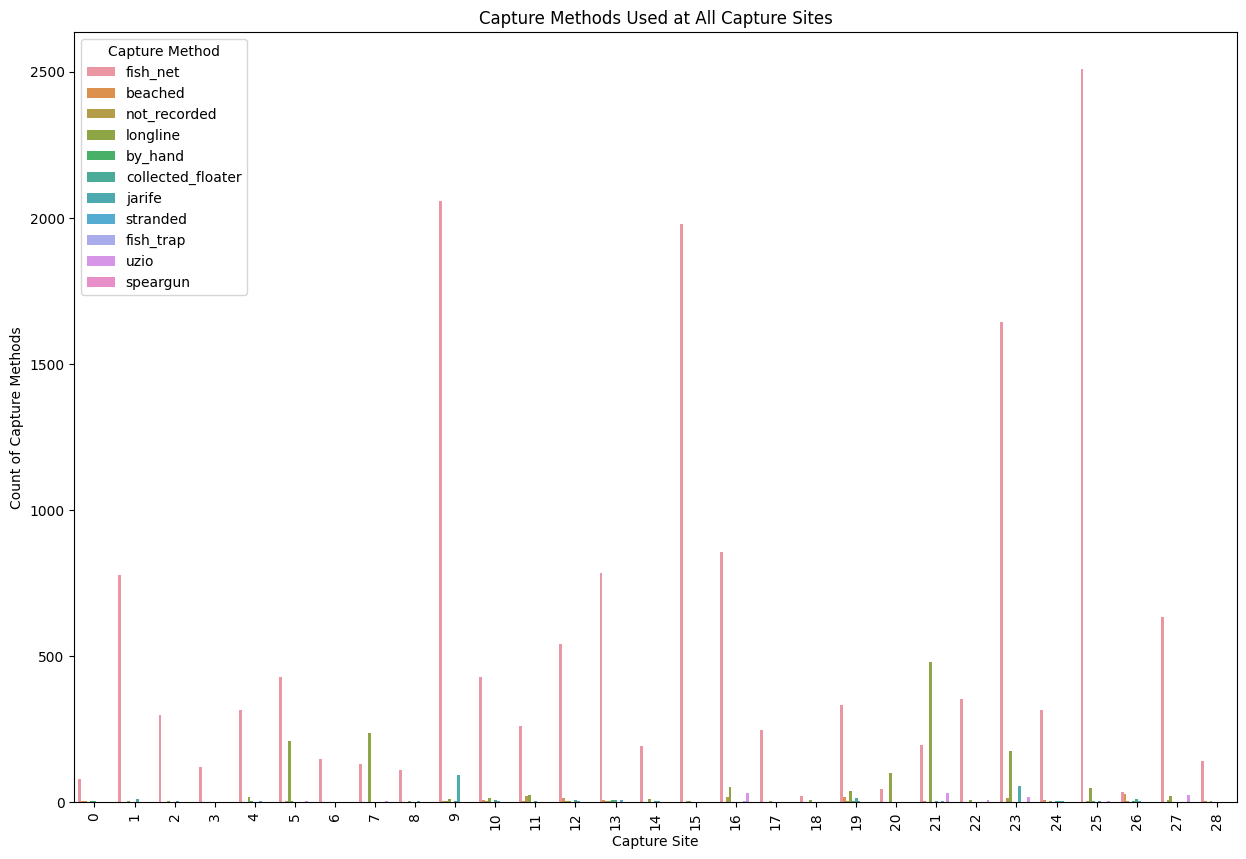

In [72]:
# Get value counts
# Plot the count of different capture methods used at all capture sites
plt.figure(figsize=(15, 10))
sns.countplot(data=train_df, x='CaptureSite', hue='CaptureMethod')
plt.title('Capture Methods Used at All Capture Sites')
plt.xticks(rotation=90)
plt.xlabel('Capture Site')
plt.ylabel('Count of Capture Methods')
plt.legend(title='Capture Method')
plt.show()

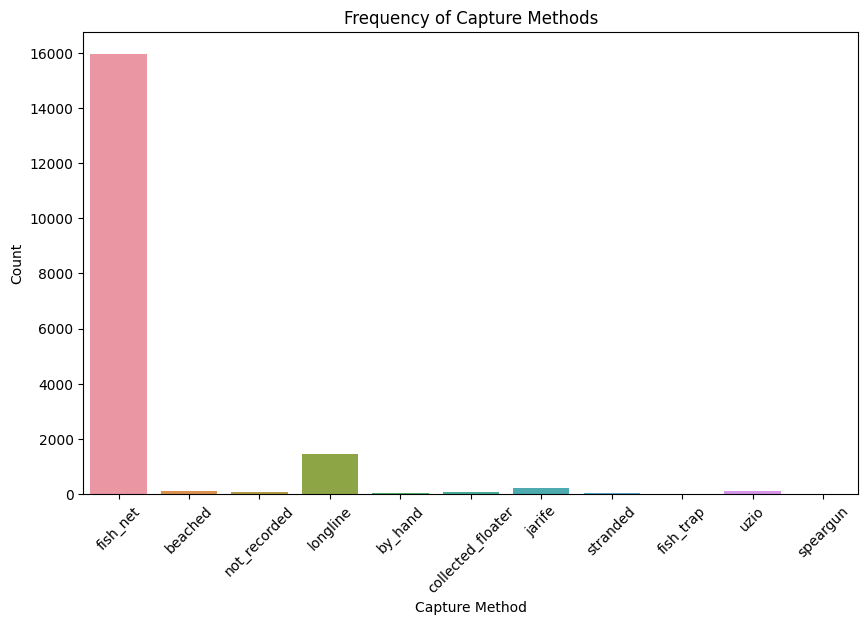

In [74]:
# visualize frequency of capture methods
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='CaptureMethod')
plt.title('Frequency of Capture Methods')
plt.xlabel('Capture Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

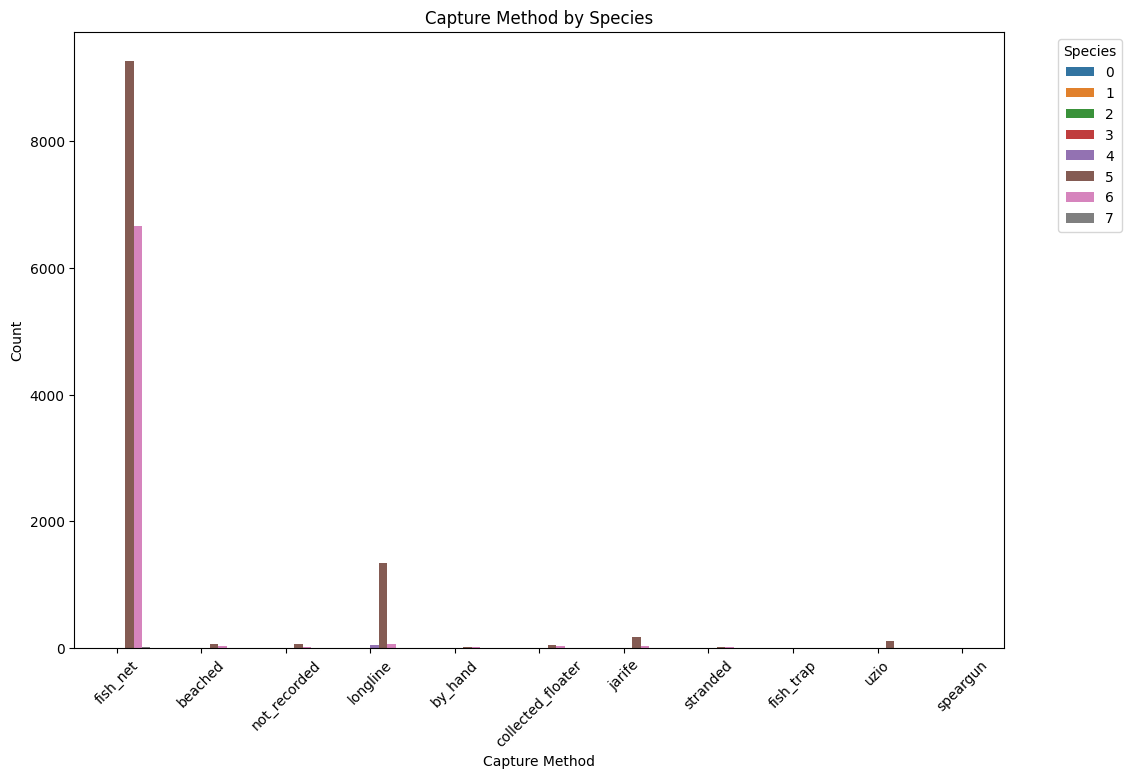

In [76]:
# Create a grouped bar plot to visualize capture method by species
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x='CaptureMethod', hue='Species')
plt.title('Capture Method by Species')
plt.xlabel('Capture Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

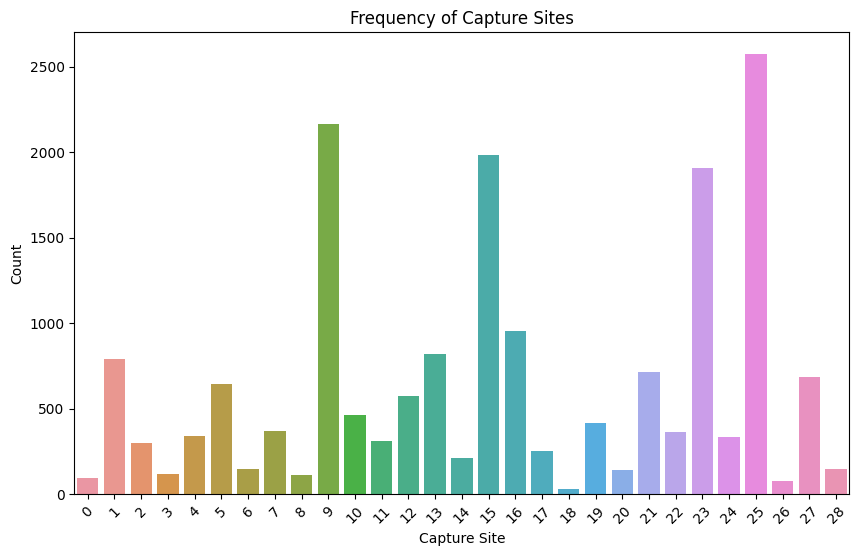

In [80]:
# visualize frequency of capture sites
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='CaptureSite')
plt.title('Frequency of Capture Sites')
plt.xlabel('Capture Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

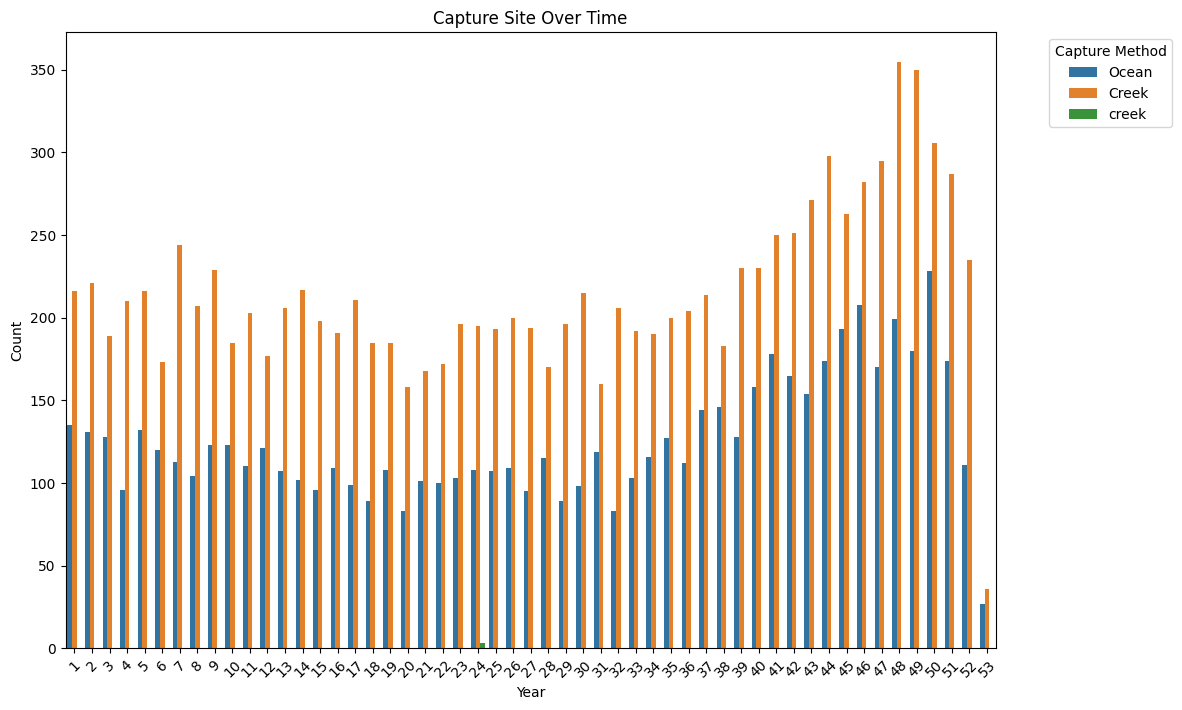

In [86]:

# Create a countplot to visualize capture site over time
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x='week', hue='ForagingGround')
plt.title('Capture Site Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Capture Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

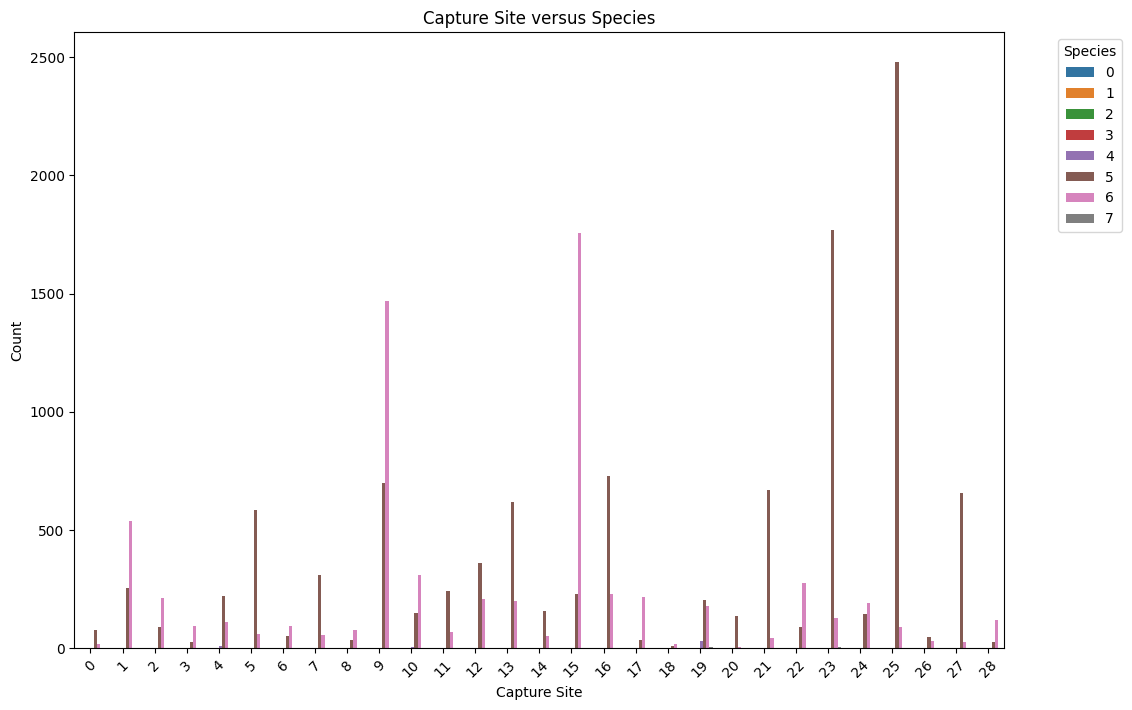

In [88]:
# Create a grouped bar plot to visualize CaptureSite versus Species
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x='CaptureSite', hue='Species')
plt.title('Capture Site versus Species')
plt.xlabel('Capture Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
